In [2]:
import pandas as pd

# Load the deliveries CSV file
deliveries = pd.read_csv(r"C:\Users\priyam\Downloads\deliveries.csv\deliveries.csv")

# Preview the data
print(deliveries.head())


   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0

In [3]:
# Show all column names to find the correct one
print(deliveries.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [4]:
deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64

In [5]:
# Top 10 bowlers by number of wickets
# (assuming 'player_dismissed' and 'bowler' columns exist)
deliveries[deliveries['player_dismissed'].notna()] \
    .groupby('bowler')['player_dismissed'].count() \
    .sort_values(ascending=False).head(10)

bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: player_dismissed, dtype: int64

In [6]:
# Calculate top 10 batters by strike rate
balls_faced = deliveries.groupby('batter')["ball"].count()
runs_scored = deliveries.groupby('batter')["batsman_runs"].sum()
strike_rate = (runs_scored / balls_faced) * 100
print(strike_rate.sort_values(ascending=False).head(10))

batter
L Wood             300.000000
B Stanlake         250.000000
J Fraser-McGurk    220.000000
R Sai Kishore      216.666667
Umar Gul           205.263158
RS Sodhi           200.000000
Shahid Afridi      176.086957
I Malhotra         175.000000
WG Jacks           172.932331
PD Salt            169.610390
dtype: float64


In [7]:
# Add strike rate and economy rate columns
# Use correct column names: 'batsman_runs' for batter runs, 'total_runs' for total runs (adjust if needed)
deliveries['is_boundary'] = deliveries['batsman_runs'].apply(lambda x: 1 if x in [4, 6] else 0)
deliveries['is_dot'] = deliveries['total_runs'].apply(lambda x: 1 if x == 0 else 0)

In [8]:
# Aggregate player stats with correct column names
player_stats = deliveries.groupby('batter').agg({
    'batsman_runs': 'sum',
    'ball': 'count',
    'is_boundary': 'sum',
    'is_dot': 'sum'
}).reset_index()

player_stats['strike_rate'] = (player_stats['batsman_runs'] / player_stats['ball']) * 100
player_stats.sort_values('batsman_runs', ascending=False).head(10)

,batter,batsman_runs,ball,is_boundary,is_dot,strike_rate
631,V Kohli,8014,6236,981,1967,128.511867
512,S Dhawan,6769,5483,921,1879,123.454313
477,RG Sharma,6630,5183,880,1852,127.918194
147,DA Warner,6567,4849,899,1628,135.429986
546,SK Raina,5536,4177,710,1276,132.535312
374,MS Dhoni,5243,3947,615,1203,132.835065
30,AB de Villiers,5181,3487,667,983,148.580442
124,CH Gayle,4997,3516,767,1387,142.121729
501,RV Uthappa,4954,3927,663,1388,126.152279
282,KD Karthik,4843,3687,627,1151,131.353404


C:\Users\priyam\AppData\Local\Temp\ipykernel_22872\3489889160.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_scorers, x='batsman_runs', y='batter', palette='viridis')


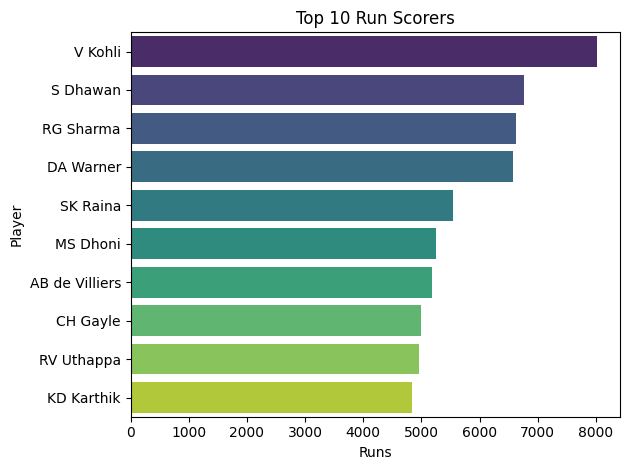

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

top_scorers = player_stats.sort_values('batsman_runs', ascending=False).head(10)
sns.barplot(data=top_scorers, x='batsman_runs', y='batter', palette='viridis')
plt.title('Top 10 Run Scorers')
plt.xlabel('Runs')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

C:\Users\priyam\AppData\Local\Temp\ipykernel_22872\961864977.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bowlers, x='economy', y='bowler', palette='magma')


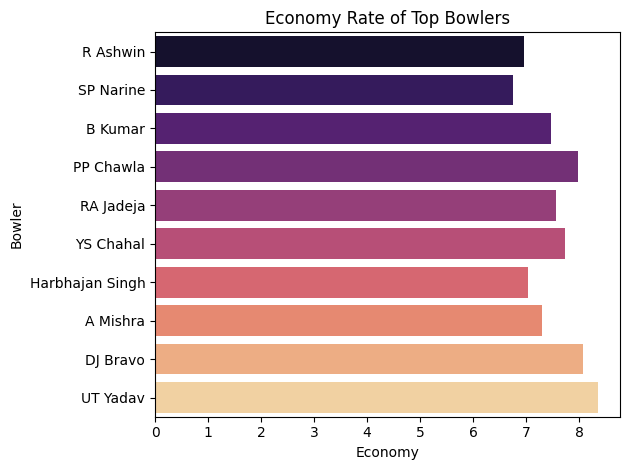

In [10]:
# Economy rate of top bowlers
bowler_stats = deliveries.groupby('bowler').agg({
    'total_runs': 'sum',
    'ball': 'count'
}).reset_index()

bowler_stats['economy'] = (bowler_stats['total_runs'] / bowler_stats['ball']) * 6
top_bowlers = bowler_stats.sort_values('ball', ascending=False).head(10)

sns.barplot(data=top_bowlers, x='economy', y='bowler', palette='magma')
plt.title('Economy Rate of Top Bowlers')
plt.xlabel('Economy')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

In [11]:
# 6. Most runs in a single over
most_runs_over = deliveries.groupby(['match_id', 'over']).agg({'total_runs': 'sum'}).reset_index()
most_runs_over = most_runs_over.sort_values('total_runs', ascending=False).head(5)
print("Most runs scored in a single over:")
print(most_runs_over)

# 7. Dismissal types distribution
if 'dismissal_kind' in deliveries.columns:
    dismissal_counts = deliveries['dismissal_kind'].value_counts()
    print("\nDismissal types distribution:")
    print(dismissal_counts)
else:
    print("\nColumn 'dismissal_kind' not found in data.")

# 8. Most productive batting partnerships
if 'non_striker' in deliveries.columns:
    partnership = deliveries.groupby(['batter', 'non_striker'])['batsman_runs'].sum().reset_index()
    top_partnerships = partnership.sort_values('batsman_runs', ascending=False).head(5)
    print("\nMost productive batting partnerships:")
    print(top_partnerships)
else:
    print("\nColumn 'non_striker' not found in data.")

# 9. Super over analysis
if 'is_super_over' in deliveries.columns:
    super_over_stats = deliveries[deliveries['is_super_over'] == 1]
    if not super_over_stats.empty:
        print("\nSuper over stats:")
        print(super_over_stats.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(5))
    else:
        print("\nNo super over data available.")
else:
    print("\nColumn 'is_super_over' not found in data.")

# 10. Consistency: Most 30+ scores
if 'match_id' in deliveries.columns:
    batter_match_runs = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
    thirties = batter_match_runs[batter_match_runs['batsman_runs'] >= 30]
    thirties_count = thirties['batter'].value_counts().head(5)
    print("\nBatters with most 30+ scores:")
    print(thirties_count)
else:
    print("\nColumn 'match_id' not found in data.")

Most runs scored in a single over:
       match_id  over  total_runs
20362   1422121    18          52
20984   1426273     2          52
19085   1359487    19          51
15054   1216496    19          51
15455   1216517     0          51

Dismissal types distribution:
dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64

Most productive batting partnerships:
              batter     non_striker  batsman_runs
324   AB de Villiers         V Kohli          1566
1477        CH Gayle         V Kohli          1508
8499         V Kohli  AB de Villiers          1474
1795       DA Warner        S Dhawan          1354
8509         V Kohli        CH Gayle          1142

Column 'is_super_over' not found in data.

